In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import plotly.express as px 

from tqdm import tqdm

pd.options.display.float_format = '{:.2f}'.format

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
age_gender = pd.read_csv('age_gender_info.csv')

In [3]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

In [6]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.00,A,15667000,103680,0.00,3.00,1425.00,1015.00
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.00,A,15667000,103680,0.00,3.00,1425.00,1015.00
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.00,A,27304000,184330,0.00,3.00,1425.00,1015.00
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.00,A,27304000,184330,0.00,3.00,1425.00,1015.00
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.00,A,27304000,184330,0.00,3.00,1425.00,1015.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.00,A,11346000,116090,0.00,1.00,166.00,146.00
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.00,A,14005000,142310,0.00,1.00,166.00,146.00
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.00,A,14005000,142310,0.00,1.00,166.00,146.00
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.00,A,14005000,142310,0.00,1.00,166.00,146.00


# 오류 1번 : 전용면적별 세대수 합계와 총세대수가 일치하지 않는 경우
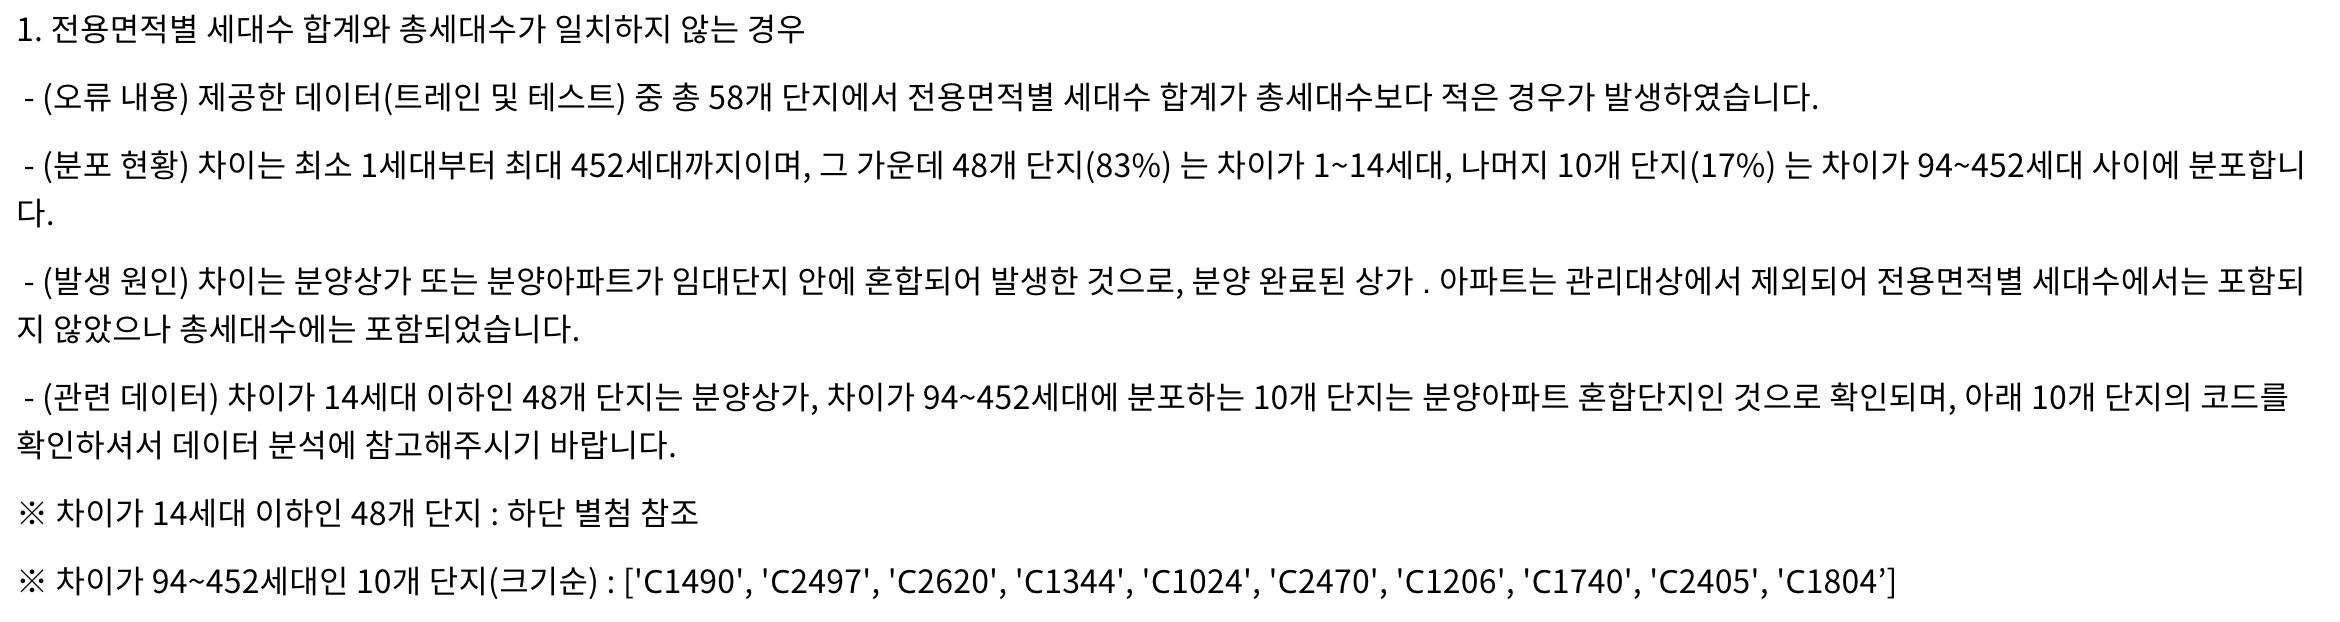

In [7]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [8]:
differ = train.groupby('단지코드').agg({'총세대수':'unique', '전용면적별세대수':'sum'})
differ['총세대수'] = differ['총세대수'].str[0].astype(int)
differ = differ[differ['총세대수'] != differ['전용면적별세대수']]
differ['차이'] = differ['총세대수'] - differ['전용면적별세대수']
differ

,총세대수,전용면적별세대수,차이
단지코드,,,
C1004,521,517,4
C1024,680,477,203
C1056,410,401,9
C1068,806,805,1
C1109,1957,1952,5
...,...,...,...
C2583,1106,1034,72
C2597,1005,991,14
C2620,1029,906,123


Text(0.5, 1.0, '총세대수와 전용면적별 세대수 합계 차')

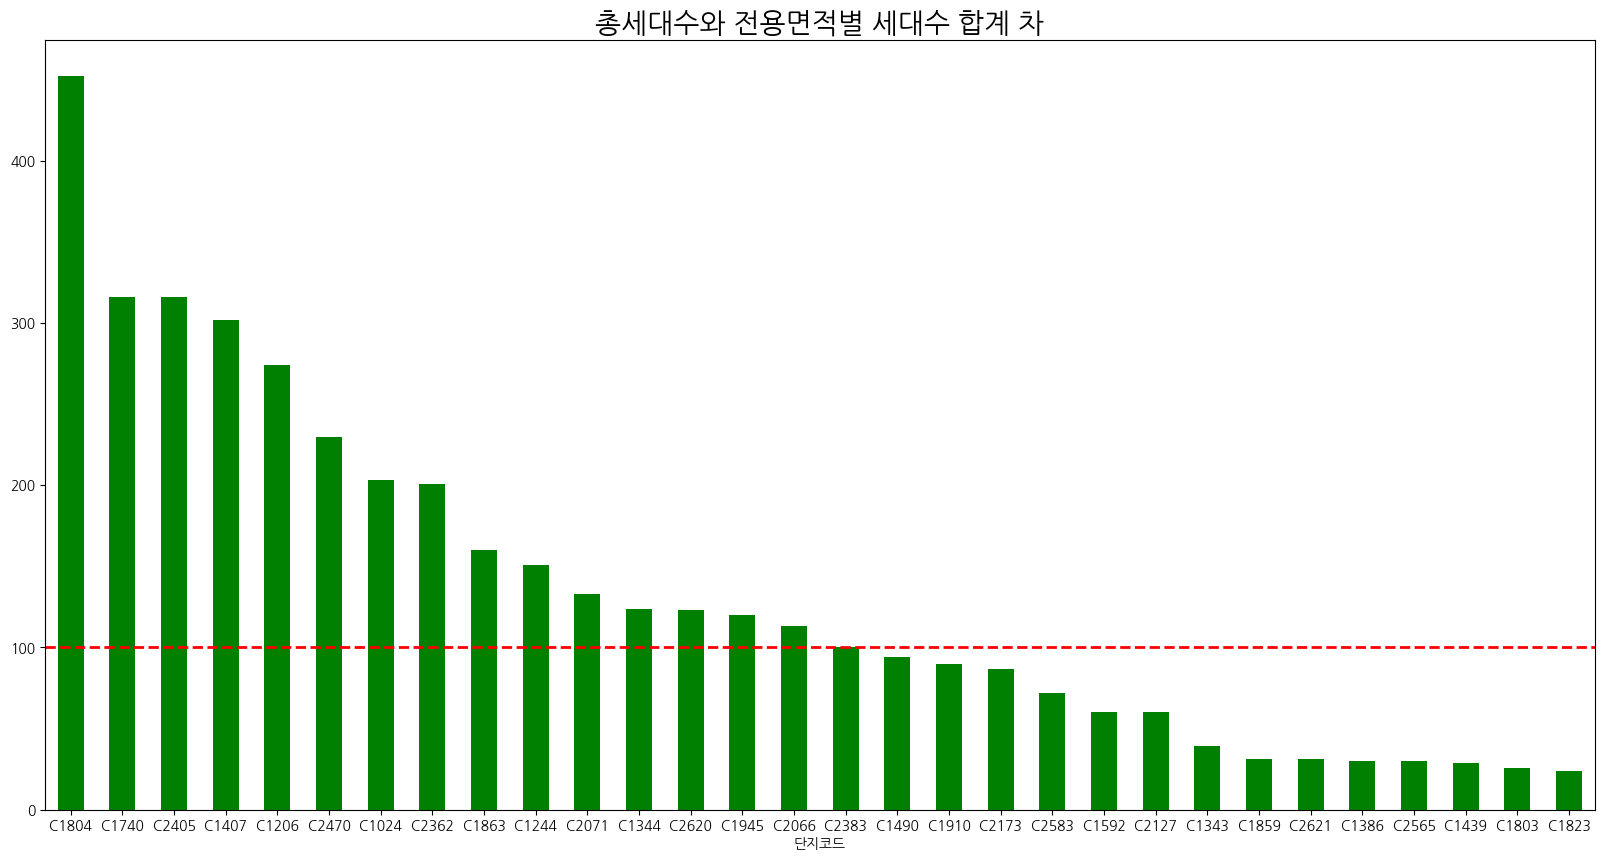

In [9]:
ax = differ.loc[differ['차이'] > 20, '차이'].sort_values(ascending=False).plot.bar(figsize=(20,10), color='Green', rot=0)
ax.axhline(y=100, color='r', linestyle='--', linewidth=2)
ax.set_title('총세대수와 전용면적별 세대수 합계 차', fontsize=20)

# 총세대수 -> 전용면적별세대수의 합계로 대체

In [10]:
correct_train = train.groupby('단지코드').agg({'전용면적별세대수':'sum'})
train['총합계'] = train['단지코드'].map(correct_train['전용면적별세대수'])

/var/folders/r8/pf246x353ddf_l7ylqqvtnhh0000gn/T/ipykernel_21793/2440393806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['총합계'] = train['단지코드'].map(correct_train['전용면적별세대수'])


In [11]:
correct_test = test.groupby('단지코드').agg({'전용면적별세대수':'sum'})
test['총합계'] = test['단지코드'].map(correct_test['전용면적별세대수'])

In [12]:
# 기존 세대수 column 삭제 and 컬럼 순서 조정 
train = train[['단지코드', '총합계', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']]

In [13]:
# 기존 세대수 column 삭제 and 컬럼 순서 조정 
test = test[['단지코드', '총합계', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수']]

# 오류 2번 : 동일한 단지에 단지코드가 2개로 부여된 경우
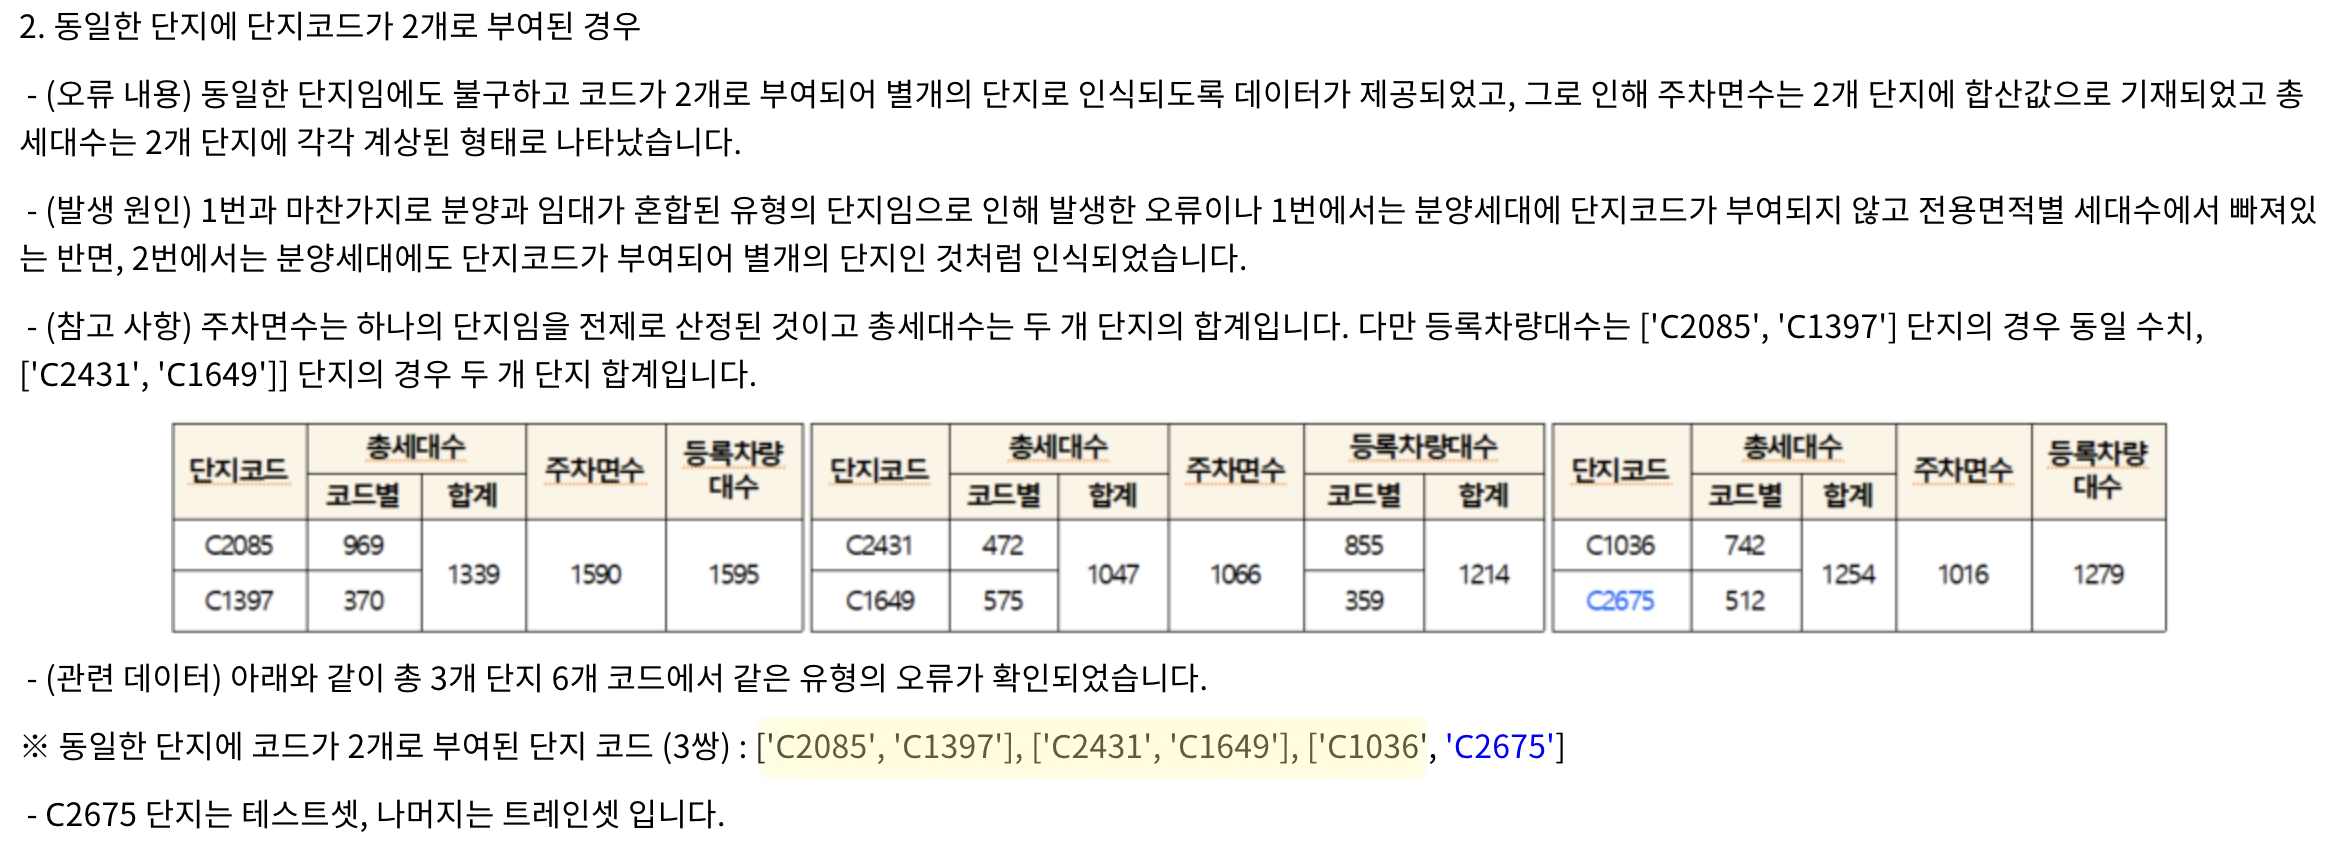

In [14]:
# 오류 2번 해당 train 데이터셋 제거
train = train[train['단지코드'] != 'C2085']
train = train[train['단지코드'] != 'C1397']
train = train[train['단지코드'] != 'C2431']
train = train[train['단지코드'] != 'C1649']
train = train[train['단지코드'] != 'C1036']

# 오류 3번 : 단지코드 등 기입 실수로 데이터 정제 과정에서 매칭 오류 발생
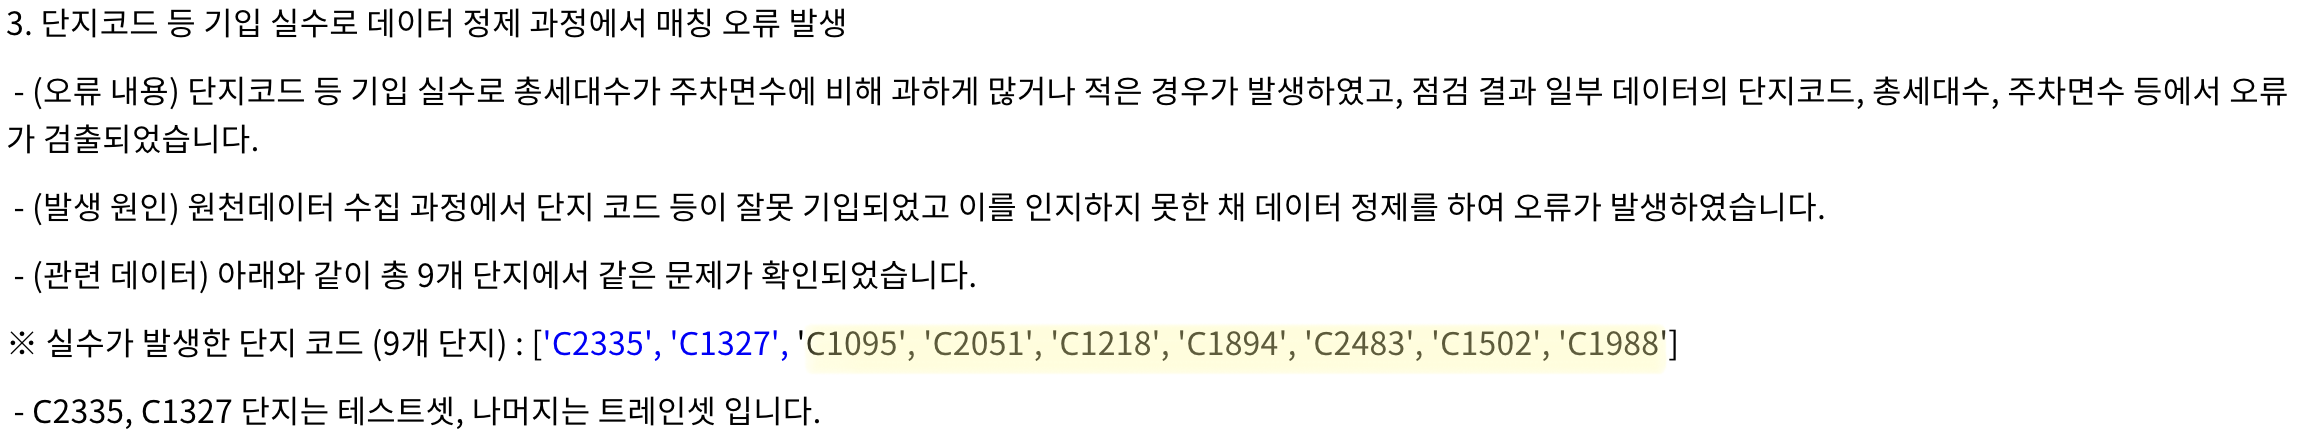

In [15]:
# 오류 3번 해당 train 데이터셋 제거
train = train[train['단지코드'] != 'C1095']
train = train[train['단지코드'] != 'C2051']
train = train[train['단지코드'] != 'C1218']
train = train[train['단지코드'] != 'C1894']
train = train[train['단지코드'] != 'C2483']
train = train[train['단지코드'] != 'C1502']
train = train[train['단지코드'] != 'C1988']

In [16]:
train.shape, test.shape

((2549, 15), (949, 14))

# 결측치 확인 및 대체

In [17]:
print(f'train 데이터 결측치 :\n {train.isnull().sum()}')
print('='*30)
print(f'test 데이터 결측치 :\n {test.isnull().sum()}')

train 데이터 결측치 :
 단지코드                              0
총합계                               0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           292
임대료                             292
도보 10분거리 내 지하철역 수(환승노선 수 반영)    151
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64
test 데이터 결측치 :
 단지코드                              0
총합계                               0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           114
임대료                             114
도보 10분거리 내 지하철역 수(

## 임대보증금과 임대료 결측치 대체
- 임대상가 -> 지역별 평균값으로 대체

- 다른 공급유형은 LH에서 지정한 비율을 토대로 평균값에서 차등분배? 
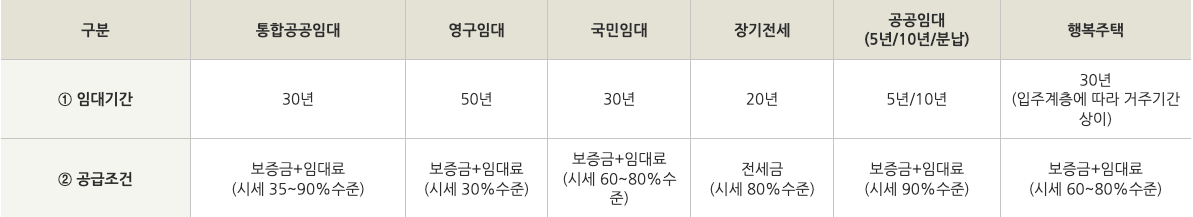

In [18]:
train[['임대보증금','임대료']] = train[['임대보증금','임대료']].replace('-',np.nan)
test[['임대보증금','임대료']] = test[['임대보증금','임대료']].replace('-',np.nan)

In [19]:
train[['임대보증금','임대료']] = train[['임대보증금','임대료']].astype(float)
test[['임대보증금','임대료']] = test[['임대보증금','임대료']].astype(float)

In [20]:
print(train[train['임대보증금'].isnull()][['임대건물구분','공급유형','자격유형','지역']].value_counts())
print(train[train['임대료'].isnull()][['임대건물구분','공급유형','자격유형','지역']].value_counts())

임대건물구분  공급유형  자격유형  지역     
상가      임대상가  D     부산광역시      125
                    대전광역시       58
                    경상남도        45
                    충청남도        44
                    강원도         10
아파트     공공분양  D     대전광역시        7
        국민임대  H     부산광역시        5
        행복주택  K     강원도          4
상가      임대상가  D     제주특별자치도      3
아파트     국민임대  H     대구광역시        3
dtype: int64
임대건물구분  공급유형  자격유형  지역     
상가      임대상가  D     부산광역시      125
                    대전광역시       58
                    경상남도        45
                    충청남도        44
                    강원도         10
아파트     공공분양  D     대전광역시        7
        국민임대  H     부산광역시        5
        행복주택  K     강원도          4
상가      임대상가  D     제주특별자치도      3
아파트     국민임대  H     대구광역시        3
        장기전세  A     서울특별시        3
dtype: int64


In [21]:
# train데이터 임대 보증금 결측치 처리
train.loc[train['공급유형'] == '공공분양','임대보증금'] = train['임대보증금'].fillna(0)
train.loc[(train['공급유형'] == '국민임대') & (train['지역'] == '부산광역시'),'임대보증금']  =  train['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
train.loc[(train['공급유형'] == '행복주택') & (train['지역'] == '강원도'),'임대보증금']  =  train['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
train.loc[(train['공급유형'] == '국민임대') & (train['지역'] == '대구광역시'),'임대보증금']  =  train['임대보증금'].fillna(train[train['지역'] == '대구광역시']['임대보증금'].mean())

In [22]:
# train데이터 임대료 결측치 처리
train.loc[train['공급유형'] == '공공분양','임대료'] = train['임대료'].fillna(0)
train.loc[(train['공급유형'] == '장기전세') & (train['지역'] == '서울특별시'),'임대료']  =  train['임대료'].fillna(0)
train.loc[(train['공급유형'] == '국민임대') & (train['지역'] == '부산광역시'),'임대료']  =  train['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
train.loc[(train['공급유형'] == '행복주택') & (train['지역'] == '강원도'),'임대료']  =  train['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
train.loc[(train['공급유형'] == '국민임대') & (train['지역'] == '대구광역시'),'임대료']  =  train['임대료'].fillna(train[train['지역'] == '대구광역시']['임대료'].mean())

In [23]:
# test데이터 임대 상가의 임대보증금 결측치 처리 
train.loc[train['지역'] == '부산광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
train.loc[train['지역'] == '대전광역시', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())
train.loc[train['지역'] == '경상남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())
train.loc[train['지역'] == '충청남도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
train.loc[train['지역'] == '강원도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대보증금'] = train['임대보증금'].fillna(train[train['지역'] == '제주특별자치도']['임대보증금'].mean())

In [24]:
# test데이터 임대 상가의 임대료 결측치 처리
train.loc[train['지역'] == '부산광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
train.loc[train['지역'] == '대전광역시', '임대료'] = train['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())
train.loc[train['지역'] == '경상남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())
train.loc[train['지역'] == '충청남도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
train.loc[train['지역'] == '강원도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
train.loc[train['지역'] == '제주특별자치도', '임대료'] = train['임대료'].fillna(train[train['지역'] == '제주특별자치도']['임대료'].mean())

In [25]:
print(test[test['임대보증금'].isnull()][['임대건물구분','공급유형','자격유형','지역']].value_counts())
print(test[test['임대료'].isnull()][['임대건물구분','공급유형','자격유형','지역']].value_counts())

임대건물구분  공급유형  자격유형  지역   
상가      임대상가  D     강원도      29
                    울산광역시    28
                    부산광역시    27
                    충청남도     15
                    대전광역시    13
아파트     행복주택  L     경상남도      4
        영구임대  C     강원도       2
              D     대전광역시     2
dtype: int64
임대건물구분  공급유형  자격유형  지역   
상가      임대상가  D     강원도      29
                    울산광역시    28
                    부산광역시    27
                    충청남도     15
                    대전광역시    13
아파트     행복주택  L     경상남도      4
        영구임대  C     강원도       2
              D     대전광역시     2
dtype: int64


In [26]:
# 임대 보증금 결측치 처리
test.loc[(test['공급유형'] == '행복주택') & (test['지역'] == '경상남도'),'임대보증금']  =  test['임대보증금'].fillna(train[train['지역'] == '경상남도']['임대보증금'].mean())
test.loc[(test['공급유형'] == '영구임대') & (test['지역'] == '강원도'),'임대보증금']  =  test['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean()*0.5)
test.loc[(test['공급유형'] == '영구임대') & (test['지역'] == '대전광역시'),'임대보증금']  =  test['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean()*0.5)

In [27]:
# 임대료 결측치 처리
test.loc[(test['공급유형'] == '행복주택') & (test['지역'] == '경상남도'),'임대료']  =  test['임대료'].fillna(train[train['지역'] == '경상남도']['임대료'].mean())
test.loc[(test['공급유형'] == '영구임대') & (test['지역'] == '강원도'),'임대료']  =  test['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean()*0.5)
test.loc[(test['공급유형'] == '영구임대') & (test['지역'] == '대전광역시'),'임대료']  =  test['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean()*0.5)

In [28]:
#임대 상가의 임대보증금 결측치 처리 
test.loc[test['지역'] == '강원도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '강원도']['임대보증금'].mean())
test.loc[test['지역'] == '울산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '울산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '부산광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '부산광역시']['임대보증금'].mean())
test.loc[test['지역'] == '충청남도', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '충청남도']['임대보증금'].mean())
test.loc[test['지역'] == '대전광역시', '임대보증금'] = test['임대보증금'].fillna(train[train['지역'] == '대전광역시']['임대보증금'].mean())

In [29]:
# 임대 상가의 임대료 결측치 처리
test.loc[test['지역'] == '강원도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '강원도']['임대료'].mean())
test.loc[test['지역'] == '울산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '울산광역시']['임대료'].mean())
test.loc[test['지역'] == '부산광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '부산광역시']['임대료'].mean())
test.loc[test['지역'] == '충청남도', '임대료'] = test['임대료'].fillna(train[train['지역'] == '충청남도']['임대료'].mean())
test.loc[test['지역'] == '대전광역시', '임대료'] = test['임대료'].fillna(train[train['지역'] == '대전광역시']['임대료'].mean())

In [30]:
train.isnull().sum(), test.isnull().sum()

(단지코드                              0
 총합계                               0
 임대건물구분                            0
 지역                                0
 공급유형                              0
 전용면적                              0
 전용면적별세대수                          0
 공가수                               0
 자격유형                              0
 임대보증금                             0
 임대료                               0
 도보 10분거리 내 지하철역 수(환승노선 수 반영)    151
 도보 10분거리 내 버스정류장 수                0
 단지내주차면수                           0
 등록차량수                             0
 dtype: int64,
 단지코드                             0
 총합계                              0
 임대건물구분                           0
 지역                               0
 공급유형                             0
 전용면적                             0
 전용면적별세대수                         0
 공가수                              0
 자격유형                             2
 임대보증금                            0
 임대료                              0
 도보 10분거리 내 지하철역 수(환승노선 수 반영)    3

In [31]:
# 대전과 충남지역에만 결측치가 발생 :  대전 거주민으로서 아주 당연한 결과라고 생각함.
# 대전은 1호선만 있기 때문에 지하철 역과 가까운 거리에 있는 집이 거의 없다...
# 충남권도 아마 아예 없거나 천안 지하철뿐일텐데 당연한결과...
print(train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()][['임대건물구분','지역']].value_counts())
print(test[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()][['임대건물구분','지역']].value_counts())

임대건물구분  지역   
상가      충청남도     44
아파트     대전광역시    41
        충청남도     38
상가      대전광역시    28
dtype: int64
임대건물구분  지역   
상가      충청남도     15
아파트     충청남도     11
        대전광역시     8
dtype: int64


## 지하철역 결측치

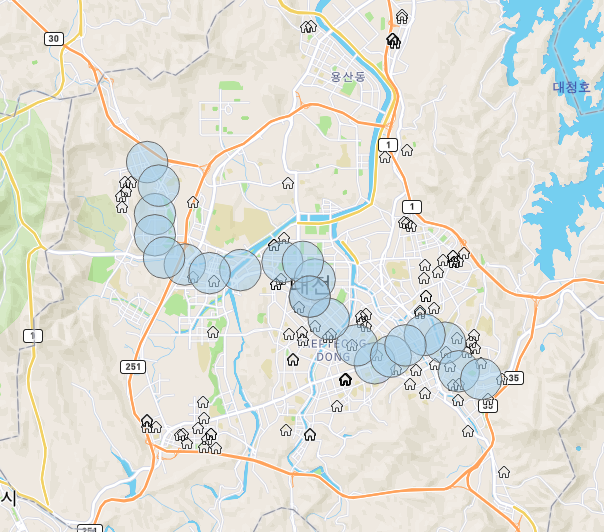

- 위 그림을 통해 결측치를 0으로

In [32]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

## 버스정류장

- 결측치를 0으로 대체한다.

In [33]:
train['도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].fillna(0)

In [34]:
test['도보 10분거리 내 버스정류장 수'].describe()

count   949.00
mean      4.69
std       5.56
min       1.00
25%       2.00
50%       3.00
75%       5.00
max      50.00
Name: 도보 10분거리 내 버스정류장 수, dtype: float64

In [35]:
test.loc[test['도보 10분거리 내 버스정류장 수'] == 50, '도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].mean()

In [36]:
print(test[test['자격유형'].isnull()][['단지코드','임대건물구분','지역']].value_counts())

단지코드   임대건물구분  지역  
C2253  아파트     강원도     1
C2411  아파트     경상남도    1
dtype: int64


## 자격유형 결측치 대체

- 'C2411', 'C2253' 둘다 단순 누락으로 보여진다.

In [37]:
test[test.단지코드=='C2411']

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,961,아파트,경상남도,국민임대,39.43,56,25.00,A,11992000.00,100720.00,0.00,2.00,840.00
194,C2411,961,아파트,경상남도,국민임대,39.72,336,25.00,A,11992000.00,100720.00,0.00,2.00,840.00
195,C2411,961,아파트,경상남도,국민임대,39.82,179,25.00,A,11992000.00,100720.00,0.00,2.00,840.00
196,C2411,961,아파트,경상남도,국민임대,46.90,240,25.00,NaN,71950000.00,37470.00,0.00,2.00,840.00
197,C2411,961,아파트,경상남도,국민임대,51.93,150,25.00,A,21586000.00,171480.00,0.00,2.00,840.00


In [38]:
test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'

In [39]:
test[test.단지코드=='C2253']

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1149,아파트,강원도,영구임대,26.37,745,0.00,NaN,2249000.00,44770.00,0.00,2.00,173.00
259,C2253,1149,아파트,강원도,영구임대,31.32,239,0.00,C,3731000.00,83020.00,0.00,2.00,173.00
260,C2253,1149,아파트,강원도,영구임대,31.32,149,0.00,C,3731000.00,83020.00,0.00,2.00,173.00
261,C2253,1149,상가,강원도,임대상가,13.77,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
262,C2253,1149,상가,강원도,임대상가,22.89,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
263,C2253,1149,상가,강원도,임대상가,22.91,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
264,C2253,1149,상가,강원도,임대상가,23.79,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
266,C2253,1149,상가,강원도,임대상가,23.86,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
268,C2253,1149,상가,강원도,임대상가,24.19,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00
269,C2253,1149,상가,강원도,임대상가,27.75,1,0.00,D,18042708.61,183413.11,0.00,2.00,173.00


In [40]:
test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'

In [41]:
train.isnull().sum(), test.isnull().sum()

(단지코드                            0
 총합계                             0
 임대건물구분                          0
 지역                              0
 공급유형                            0
 전용면적                            0
 전용면적별세대수                        0
 공가수                             0
 자격유형                            0
 임대보증금                           0
 임대료                             0
 도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
 도보 10분거리 내 버스정류장 수              0
 단지내주차면수                         0
 등록차량수                           0
 dtype: int64,
 단지코드                            0
 총합계                             0
 임대건물구분                          0
 지역                              0
 공급유형                            0
 전용면적                            0
 전용면적별세대수                        0
 공가수                             0
 자격유형                            0
 임대보증금                           0
 임대료                             0
 도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
 도보 10분거리 내 버스정류장 수              0
 단지내주

In [42]:
train

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.00,A,9216000.00,82940.00,0.00,3.00,624.00,205.00
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.00,A,12672000.00,107130.00,0.00,3.00,624.00,205.00
10,C2515,545,아파트,경상남도,국민임대,39.60,20,17.00,A,12672000.00,107130.00,0.00,3.00,624.00,205.00
11,C2515,545,아파트,경상남도,국민임대,46.90,38,17.00,A,18433000.00,149760.00,0.00,3.00,624.00,205.00
12,C2515,545,아파트,경상남도,국민임대,46.90,19,17.00,A,18433000.00,149760.00,0.00,3.00,624.00,205.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.00,A,11346000.00,116090.00,0.00,1.00,166.00,146.00
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.00,A,14005000.00,142310.00,0.00,1.00,166.00,146.00
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.00,A,14005000.00,142310.00,0.00,1.00,166.00,146.00
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.00,A,14005000.00,142310.00,0.00,1.00,166.00,146.00


In [43]:
test

,단지코드,총합계,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.00,H,22830000.00,189840.00,0.00,2.00,683.00
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.00,A,36048000.00,249930.00,0.00,2.00,683.00
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.00,H,36048000.00,249930.00,0.00,2.00,683.00
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.00,H,36048000.00,249930.00,0.00,2.00,683.00
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.00,H,43497000.00,296780.00,0.00,2.00,683.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,670,아파트,경상남도,행복주택,36.77,126,38.00,L,21387479.09,158930.23,0.00,1.00,467.00
1018,C2189,378,아파트,전라북도,국민임대,29.19,96,45.00,H,6872000.00,106400.00,0.00,2.00,300.00
1019,C2189,378,아파트,전라북도,국민임대,29.19,20,45.00,H,6872000.00,106400.00,0.00,2.00,300.00
1020,C2189,378,아파트,전라북도,국민임대,39.45,202,45.00,H,13410000.00,144600.00,0.00,2.00,300.00


# 성별 데이터 활용

- 경제활동인구(Economically active population) : 15세에서 64세 사이의 청년·장년층 인구 // 이 인구의 비율이 높을 수록 주차 수요가 많을 것이다.

    => 해당 연령 컬럼을 합쳐서 새로운 컬럼을 만들자
    
- 라고 생각을 해봤는데? 연령별 차량소유를 보니 70대도 많자냥?

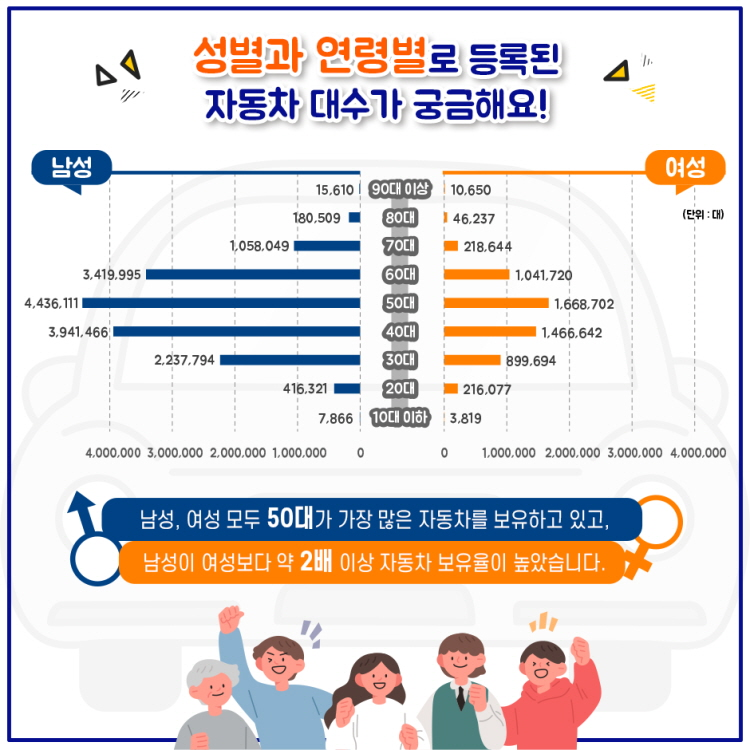

In [44]:
age_gender

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.03,0.03,0.06,0.06,0.06,0.07,0.05,0.05,0.08,...,0.08,0.06,0.05,0.03,0.03,0.01,0.01,0.00,0.00,0.00
1,경상남도,0.03,0.03,0.05,0.06,0.06,0.07,0.06,0.06,0.08,...,0.09,0.07,0.05,0.03,0.03,0.01,0.00,0.00,0.00,0.00
2,대전광역시,0.03,0.03,0.04,0.04,0.06,0.06,0.07,0.07,0.07,...,0.09,0.07,0.05,0.04,0.03,0.01,0.01,0.00,0.00,0.00
3,경기도,0.04,0.04,0.05,0.05,0.06,0.06,0.07,0.07,0.08,...,0.07,0.06,0.04,0.03,0.03,0.01,0.01,0.00,0.00,0.00
4,전라북도,0.03,0.03,0.06,0.06,0.07,0.07,0.05,0.05,0.08,...,0.08,0.07,0.05,0.04,0.04,0.01,0.01,0.00,0.00,0.00
5,강원도,0.03,0.03,0.05,0.05,0.06,0.06,0.06,0.05,0.08,...,0.09,0.07,0.05,0.03,0.03,0.01,0.01,0.00,0.00,0.00
6,광주광역시,0.03,0.03,0.05,0.05,0.07,0.07,0.07,0.06,0.08,...,0.08,0.06,0.05,0.03,0.03,0.01,0.01,0.00,0.00,0.00
7,충청남도,0.03,0.03,0.06,0.06,0.07,0.07,0.07,0.07,0.08,...,0.07,0.06,0.04,0.03,0.02,0.01,0.01,0.00,0.00,0.00
8,부산광역시,0.02,0.02,0.03,0.04,0.05,0.06,0.05,0.05,0.06,...,0.11,0.09,0.08,0.05,0.05,0.02,0.01,0.00,0.00,0.00
9,제주특별자치도,0.03,0.04,0.06,0.06,0.07,0.07,0.05,0.05,0.08,...,0.07,0.06,0.05,0.03,0.03,0.01,0.01,0.00,0.00,0.00


In [45]:
age_gender_region = age_gender.set_index('지역')

In [46]:
age_gender_region.loc['전체 평균'] = age_gender_region.mean()
age_gender_region.loc['전체 평균']

10대미만(여자)   0.03
10대미만(남자)   0.03
10대(여자)     0.05
10대(남자)     0.05
20대(여자)     0.06
20대(남자)     0.07
30대(여자)     0.06
30대(남자)     0.06
40대(여자)     0.08
40대(남자)     0.07
50대(여자)     0.08
50대(남자)     0.07
60대(여자)     0.08
60대(남자)     0.07
70대(여자)     0.05
70대(남자)     0.04
80대(여자)     0.03
80대(남자)     0.01
90대(여자)     0.01
90대(남자)     0.00
100대(여자)    0.00
100대(남자)    0.00
Name: 전체 평균, dtype: float64

In [47]:
age_gender_region.loc['광역시 평균'] = age_gender_region[(age_gender_region.index.str.contains('시'))
                                     & (~age_gender_region.index.str.contains('세종'))].mean()
age_gender_region.loc['광역시 평균']

10대미만(여자)   0.02
10대미만(남자)   0.03
10대(여자)     0.04
10대(남자)     0.04
20대(여자)     0.06
20대(남자)     0.06
30대(여자)     0.06
30대(남자)     0.06
40대(여자)     0.07
40대(남자)     0.07
50대(여자)     0.08
50대(남자)     0.07
60대(여자)     0.10
60대(남자)     0.07
70대(여자)     0.06
70대(남자)     0.04
80대(여자)     0.04
80대(남자)     0.02
90대(여자)     0.01
90대(남자)     0.00
100대(여자)    0.00
100대(남자)    0.00
Name: 광역시 평균, dtype: float64

In [48]:
age_gender_region.loc['도 평균'] = age_gender_region.loc[age_gender_region.index.str.contains('도')].mean()
age_gender_region.loc['도 평균']

10대미만(여자)   0.03
10대미만(남자)   0.03
10대(여자)     0.06
10대(남자)     0.06
20대(여자)     0.06
20대(남자)     0.07
30대(여자)     0.06
30대(남자)     0.06
40대(여자)     0.08
40대(남자)     0.07
50대(여자)     0.08
50대(남자)     0.07
60대(여자)     0.08
60대(남자)     0.06
70대(여자)     0.05
70대(남자)     0.03
80대(여자)     0.03
80대(남자)     0.01
90대(여자)     0.01
90대(남자)     0.00
100대(여자)    0.00
100대(남자)    0.00
Name: 도 평균, dtype: float64

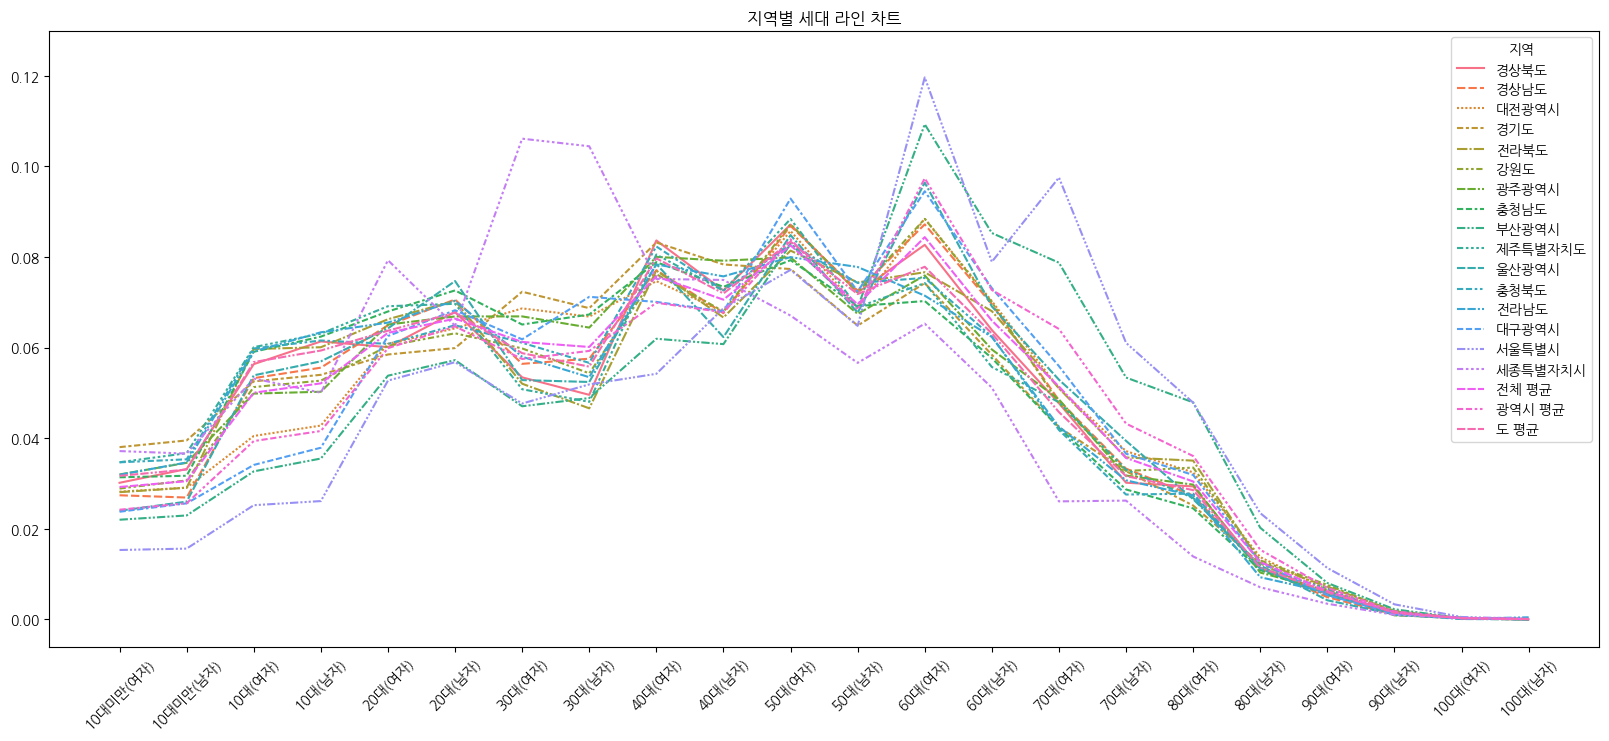

In [49]:
# plt.ylim(top = 0.13)로 설정한 이유는 수치데이터의 최대값이 0.119여서 넉넉히 0.13으로 제한을 둠
fig = plt.figure(figsize = (20, 8))
sns.lineplot(data = age_gender_region.T)
plt.title('지역별 세대 라인 차트')
plt.xticks(rotation = 45)
plt.ylim(top = 0.13)
plt.show()

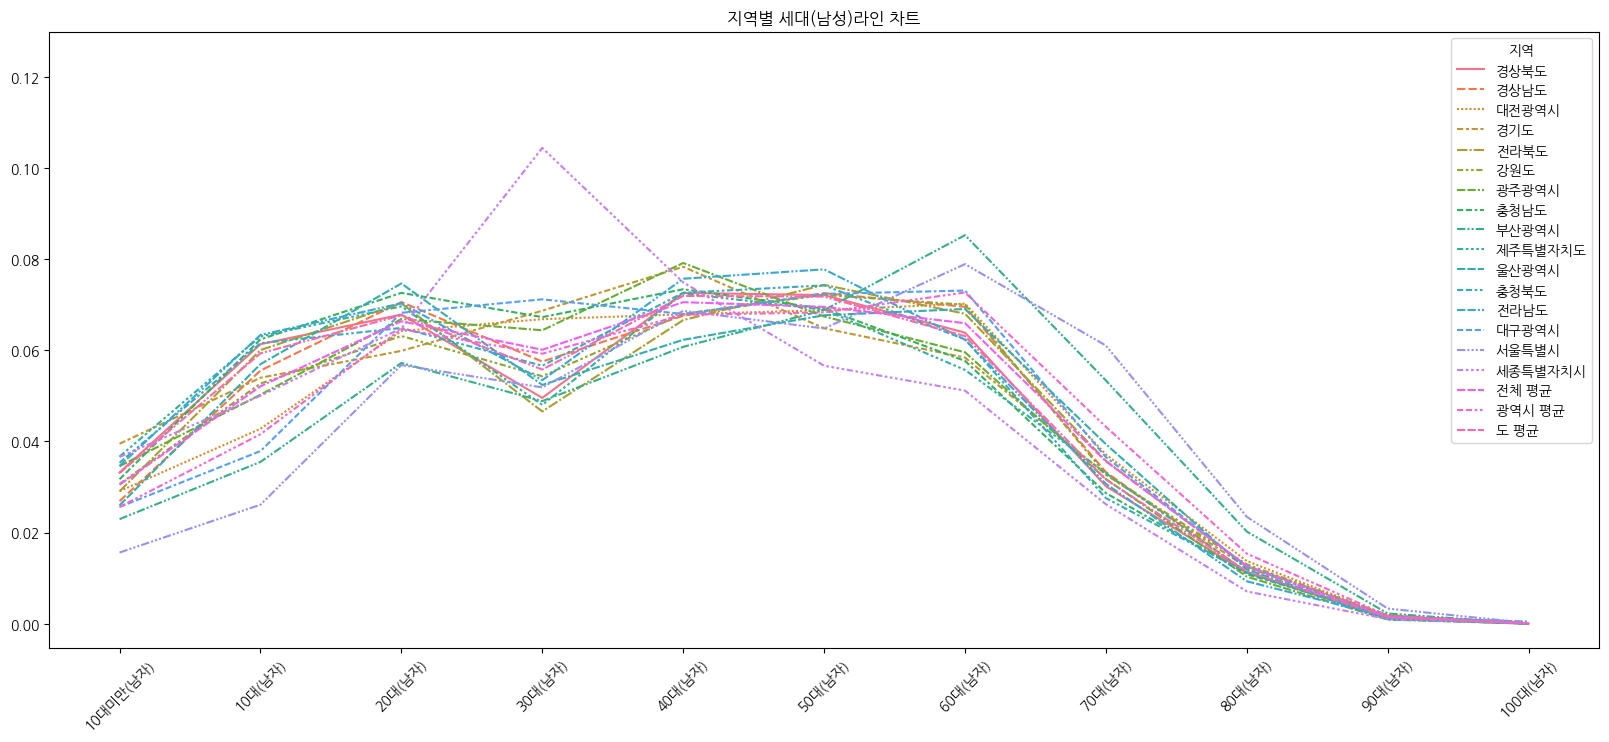

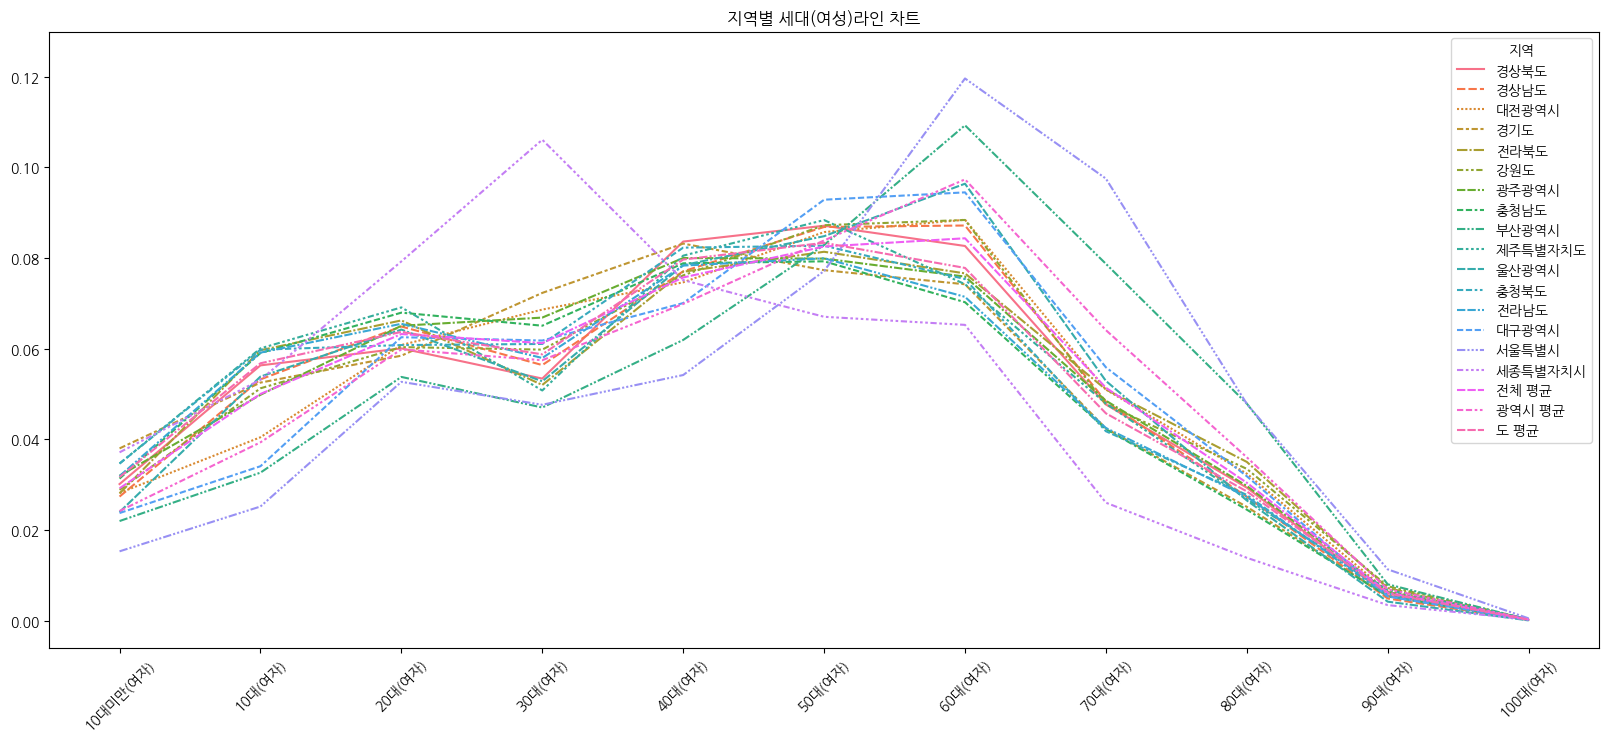

In [50]:
fig = plt.figure(figsize = (20,8))
sns.lineplot(data = age_gender_region.loc[:,age_gender_region.columns.str.contains('남자')].T)
plt.title('지역별 세대(남성)라인 차트')
plt.xticks(rotation = 45)
plt.ylim(top=0.13)
plt.show()

fig = plt.figure(figsize = (20,8))
sns.lineplot(data = age_gender_region.loc[:,age_gender_region.columns.str.contains('여자')].T)
plt.title('지역별 세대(여성)라인 차트')
plt.xticks(rotation = 45)
plt.ylim(top=0.13)
plt.show()

- 위에서 구한 그래프를 보면 남녀 둘다 비슷한 분포를 그리는 것을 알 수 있다.
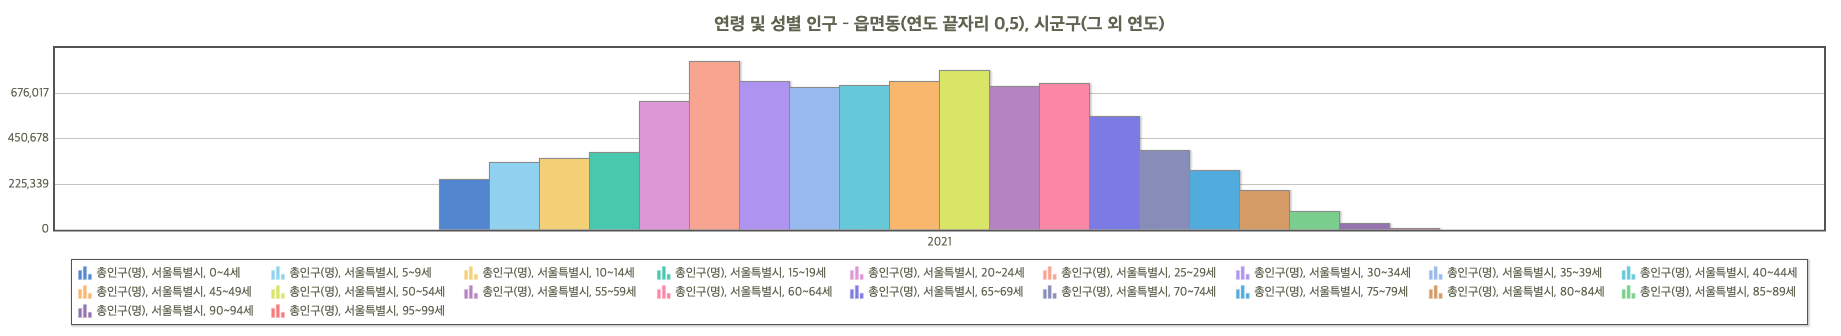
서울시 인구분포
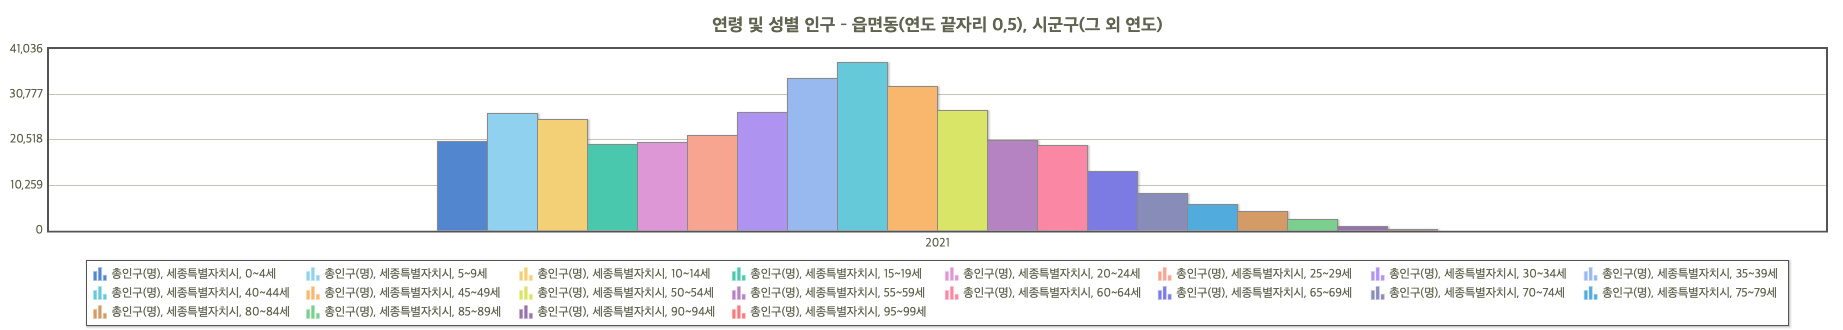
세종시 인구분포

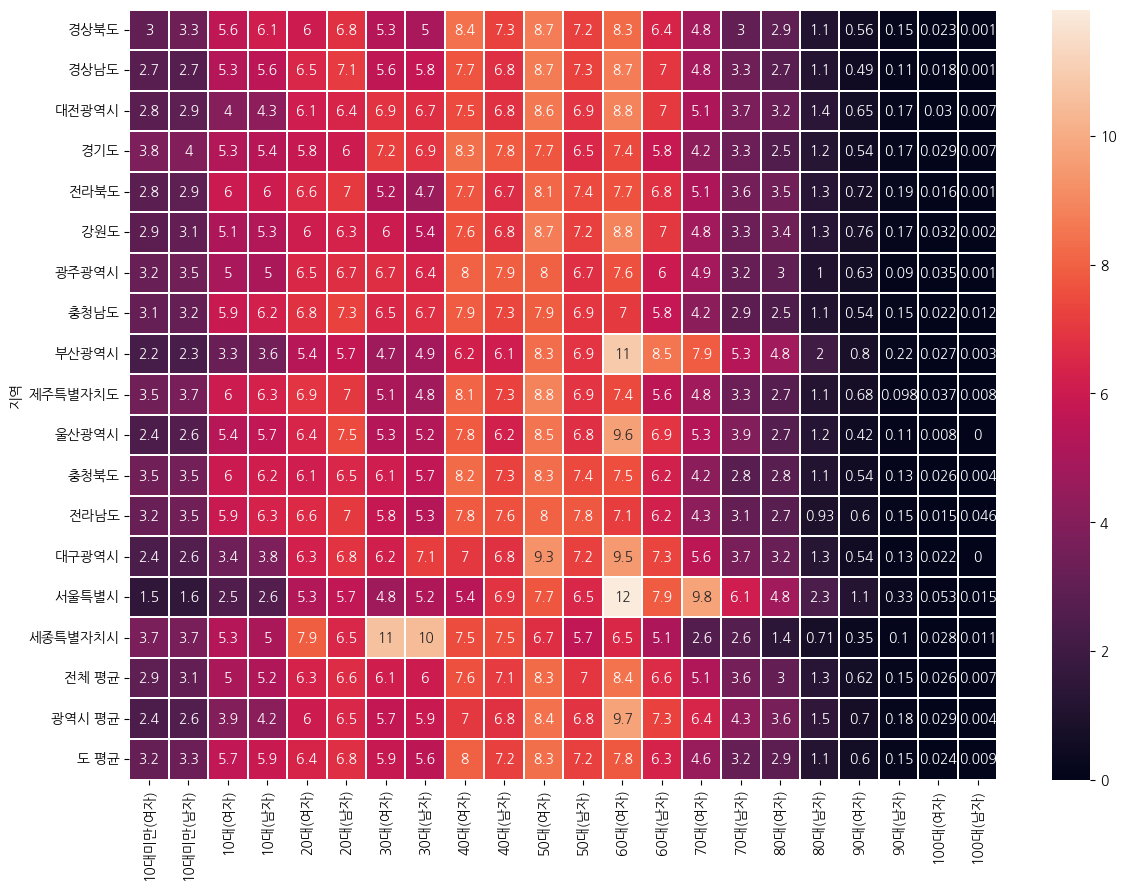

In [51]:
plt.figure(figsize=(14, 10))
sns.heatmap((age_gender_region*100).round(3),
           annot=True, linewidths=0.01,)

plt.show()

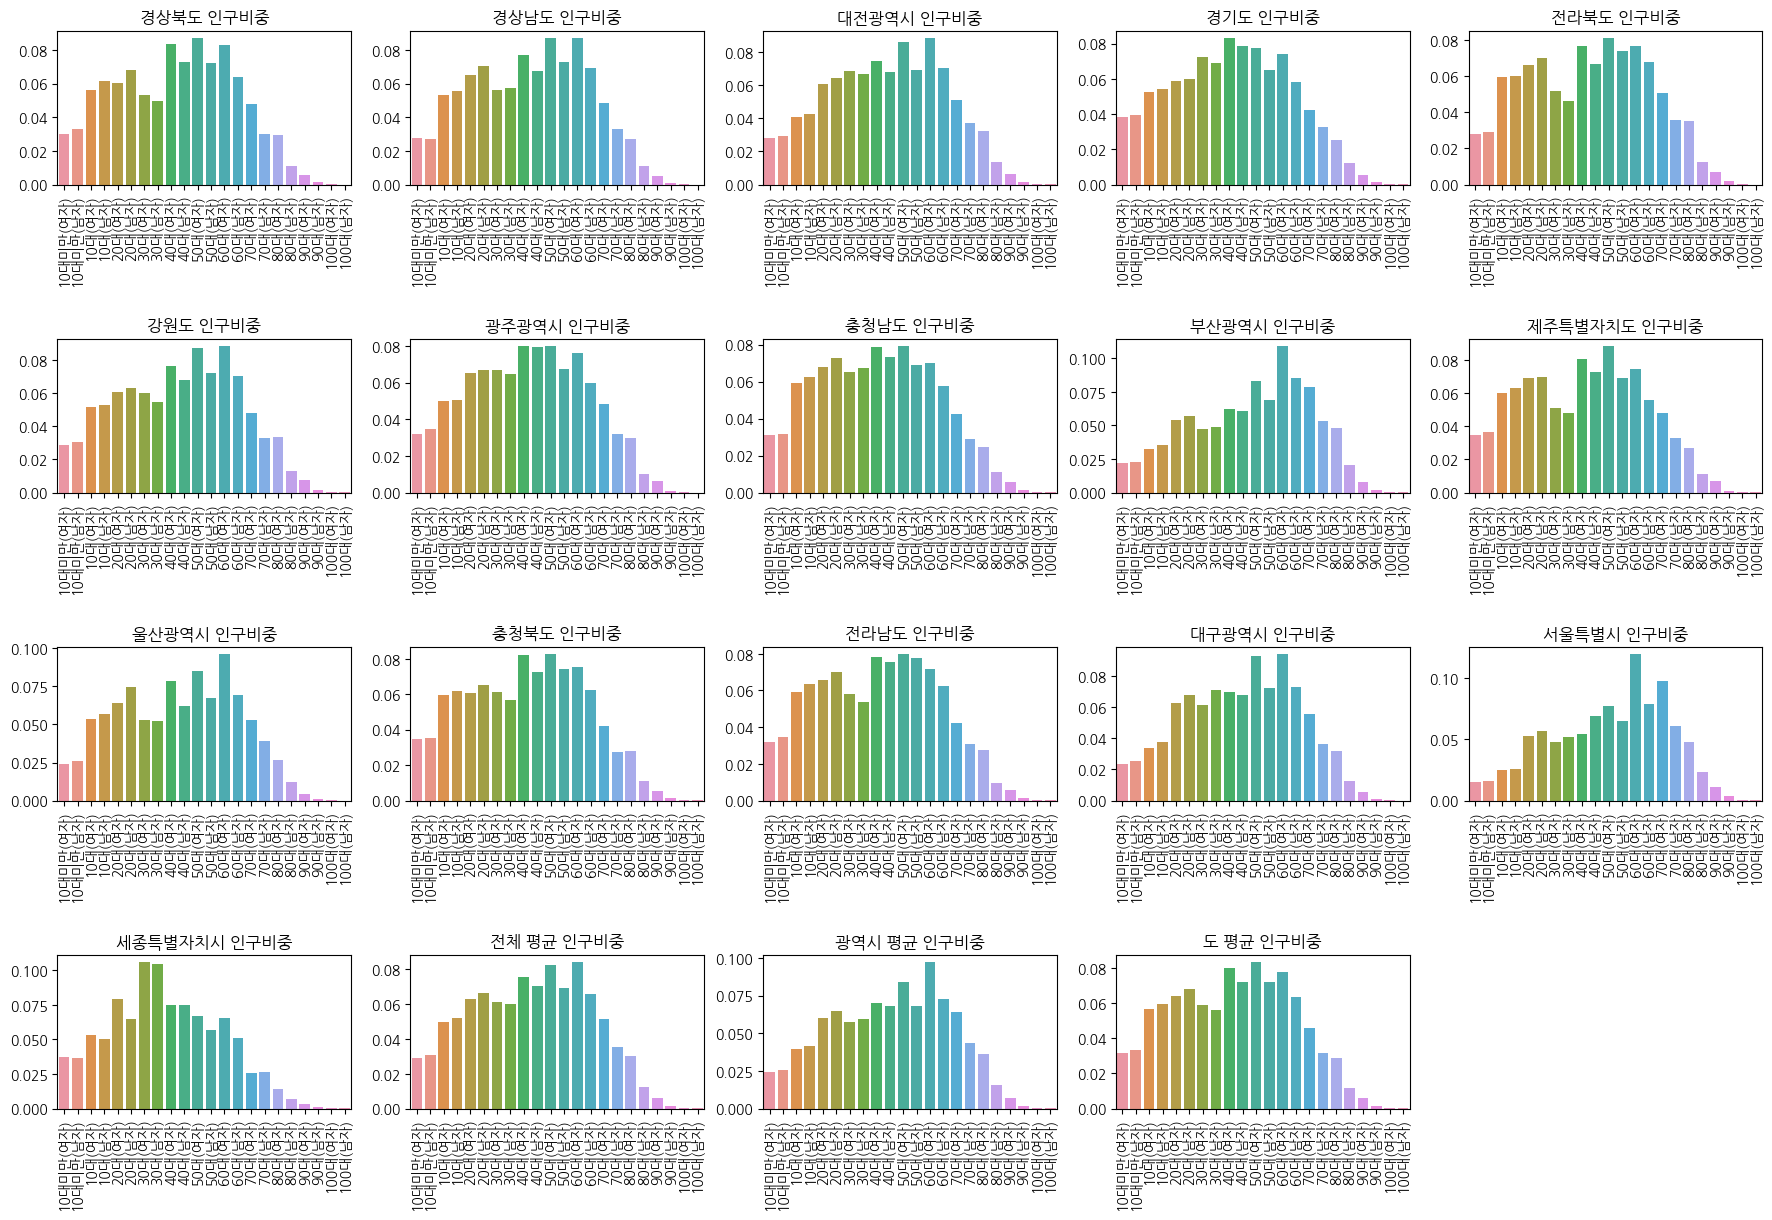

In [52]:
fig = plt.figure(figsize=(22, 18))
plt.xticks(rotation=90)
for i, n in enumerate(list(age_gender_region.index)):
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=1.0)
    plt.title("{} 인구비중".format(n))
    sns.barplot(data=age_gender_region.loc[age_gender_region.index == n])
    plt.xticks(rotation=90)

In [53]:
car_col = ['20대(여자)','20대(남자)','30대(여자)','30대(남자)','40대(여자)','40대(남자)',
 '50대(여자)','50대(남자)','60대(여자)','60대(남자)','70대(여자)','70대(남자)']

In [54]:
age_gender['차량보유인구(비율)'] = age_gender[car_col].sum(axis=1)

In [55]:
age_gender

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),차량보유인구(비율)
0,경상북도,0.03,0.03,0.06,0.06,0.06,0.07,0.05,0.05,0.08,...,0.06,0.05,0.03,0.03,0.01,0.01,0.00,0.00,0.00,0.77
1,경상남도,0.03,0.03,0.05,0.06,0.06,0.07,0.06,0.06,0.08,...,0.07,0.05,0.03,0.03,0.01,0.00,0.00,0.00,0.00,0.79
2,대전광역시,0.03,0.03,0.04,0.04,0.06,0.06,0.07,0.07,0.07,...,0.07,0.05,0.04,0.03,0.01,0.01,0.00,0.00,0.00,0.80
3,경기도,0.04,0.04,0.05,0.05,0.06,0.06,0.07,0.07,0.08,...,0.06,0.04,0.03,0.03,0.01,0.01,0.00,0.00,0.00,0.77
4,전라북도,0.03,0.03,0.06,0.06,0.07,0.07,0.05,0.05,0.08,...,0.07,0.05,0.04,0.04,0.01,0.01,0.00,0.00,0.00,0.77
5,강원도,0.03,0.03,0.05,0.05,0.06,0.06,0.06,0.05,0.08,...,0.07,0.05,0.03,0.03,0.01,0.01,0.00,0.00,0.00,0.78
6,광주광역시,0.03,0.03,0.05,0.05,0.07,0.07,0.07,0.06,0.08,...,0.06,0.05,0.03,0.03,0.01,0.01,0.00,0.00,0.00,0.79
7,충청남도,0.03,0.03,0.06,0.06,0.07,0.07,0.07,0.07,0.08,...,0.06,0.04,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.77
8,부산광역시,0.02,0.02,0.03,0.04,0.05,0.06,0.05,0.05,0.06,...,0.09,0.08,0.05,0.05,0.02,0.01,0.00,0.00,0.00,0.81
9,제주특별자치도,0.03,0.04,0.06,0.06,0.07,0.07,0.05,0.05,0.08,...,0.06,0.05,0.03,0.03,0.01,0.01,0.00,0.00,0.00,0.76


In [56]:
train = train.merge(age_gender, left_on= ["지역"], right_on= ["지역"], how='left')
test = test.merge(age_gender, left_on= ["지역"], right_on= ["지역"], how='left')

In [57]:
train.columns

Index(['단지코드', '총합계', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '차량보유인구(비율)'],
      dtype='object')

In [58]:
train_cols = ['단지코드','총합계', '임대건물구분', '지역','차량보유인구(비율)', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']

test_cols = ['단지코드','총합계', '임대건물구분', '지역','차량보유인구(비율)', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수']

In [59]:
train = train[train_cols]
test = test[test_cols]

In [60]:
train

,단지코드,총합계,임대건물구분,지역,차량보유인구(비율),공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,0.79,국민임대,33.48,276,17.00,A,9216000.00,82940.00,0.00,3.00,624.00,205.00
1,C2515,545,아파트,경상남도,0.79,국민임대,39.60,60,17.00,A,12672000.00,107130.00,0.00,3.00,624.00,205.00
2,C2515,545,아파트,경상남도,0.79,국민임대,39.60,20,17.00,A,12672000.00,107130.00,0.00,3.00,624.00,205.00
3,C2515,545,아파트,경상남도,0.79,국민임대,46.90,38,17.00,A,18433000.00,149760.00,0.00,3.00,624.00,205.00
4,C2515,545,아파트,경상남도,0.79,국민임대,46.90,19,17.00,A,18433000.00,149760.00,0.00,3.00,624.00,205.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,C2532,239,아파트,강원도,0.78,국민임대,49.20,19,7.00,A,11346000.00,116090.00,0.00,1.00,166.00,146.00
2545,C2532,239,아파트,강원도,0.78,국민임대,51.08,34,7.00,A,14005000.00,142310.00,0.00,1.00,166.00,146.00
2546,C2532,239,아파트,강원도,0.78,국민임대,51.73,34,7.00,A,14005000.00,142310.00,0.00,1.00,166.00,146.00
2547,C2532,239,아파트,강원도,0.78,국민임대,51.96,114,7.00,A,14005000.00,142310.00,0.00,1.00,166.00,146.00


# 파생변수 만들기

- 실거주율 : 실제 거주하는 인원이 많을 수록 주차수요는 높아질것이다.

In [61]:
train['실거주율'] = (train['총합계'] - train['공가수']) / train['총합계']
test['실거주율'] = (test['총합계'] - test['공가수']) / test['총합계']

In [62]:
train['전용면적별세대수 평균'] = train.groupby(['단지코드'])['전용면적별세대수'].mean() 
test['전용면적별세대수 평균'] = test.groupby(['단지코드'])['전용면적별세대수'].mean()

In [63]:
train.to_csv('태블로 시각화용.csv')

In [64]:
unique_cols = ['총합계', '지역', '공가수', 
               '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
               '도보 10분거리 내 버스정류장 수',
               '단지내주차면수', '등록차량수']
train_agg = train.set_index('단지코드')[unique_cols].drop_duplicates()
test_agg = test.set_index('단지코드')[[col for col in unique_cols if col!='등록차량수']].drop_duplicates()

In [65]:
train_agg


,총합계,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,
C2515,545,경상남도,17.00,0.00,3.00,624.00,205.00
C1407,914,대전광역시,13.00,1.00,1.00,1285.00,1064.00
C1945,635,경기도,6.00,1.00,3.00,734.00,730.00
C1470,696,전라북도,14.00,0.00,2.00,645.00,553.00
C1898,566,전라북도,9.00,0.00,6.00,517.00,415.00
...,...,...,...,...,...,...,...
C2586,90,제주특별자치도,7.00,0.00,3.00,66.00,57.00
C2035,492,강원도,24.00,0.00,1.00,521.00,246.00
C2020,40,부산광역시,7.00,1.00,2.00,25.00,19.00


In [66]:
test_agg


,총합계,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
단지코드,,,,,,
C1072,754,경기도,14.00,0.00,2.00,683.00
C1128,1354,경기도,9.00,0.00,3.00,1216.00
C1456,533,부산광역시,18.00,0.00,16.00,547.00
C1840,593,전라북도,7.00,0.00,3.00,543.00
C1332,1297,경기도,11.00,0.00,2.00,1112.00
...,...,...,...,...,...,...
C2456,346,제주특별자치도,17.00,0.00,4.00,270.00
C1266,591,충청북도,35.00,0.00,1.00,593.00
C2152,120,강원도,9.00,0.00,1.00,40.00


In [67]:
def reshape_cat_features(data, cast_col, value_col):
    res = data.drop_duplicates(['단지코드', cast_col]).assign(counter=1).pivot(index='단지코드', columns=cast_col, values=value_col).fillna(0)
    res.columns.name = None
    res = res.rename(columns={col:cast_col+'_'+col for col in res.columns})
    return res

In [68]:
reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter')

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1000,0.00,1.00
C1004,1.00,1.00
C1005,0.00,1.00
C1013,0.00,1.00
C1014,0.00,1.00
...,...,...
C2663,0.00,1.00
C2666,0.00,1.00
C2670,0.00,1.00


In [69]:
reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter')

,임대건물구분_상가,임대건물구분_아파트
단지코드,,
C1003,0.00,1.00
C1006,1.00,1.00
C1016,0.00,1.00
C1019,0.00,1.00
C1030,0.00,1.00
...,...,...
C2653,0.00,1.00
C2675,0.00,1.00
C2676,1.00,1.00


In [70]:
pd.concat([train.공급유형.value_counts(), test.공급유형.value_counts()], axis=1)

,공급유형,공급유형
국민임대,1699,619.00
임대상가,285,112.00
행복주택,192,121.00
공공임대(10년),173,34.00
영구임대,149,44.00
공공임대(50년),31,13.00
공공임대(분납),7,6.00
공공분양,7,NaN
장기전세,3,NaN
공공임대(5년),3,NaN


In [71]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

In [72]:
reshape_cat_features(data=train, cast_col='공급유형', value_col='counter')

,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택
단지코드,,,,,,
C1000,0.00,0.00,1.00,0.00,0.00,0.00
C1004,0.00,0.00,0.00,1.00,1.00,0.00
C1005,0.00,0.00,1.00,0.00,0.00,0.00
C1013,0.00,0.00,1.00,0.00,0.00,0.00
C1014,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...
C2663,0.00,0.00,1.00,0.00,0.00,0.00
C2666,0.00,0.00,1.00,0.00,0.00,0.00
C2670,0.00,0.00,1.00,0.00,0.00,0.00


In [73]:
reshape_cat_features(data=test, cast_col='공급유형', value_col='counter')


,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택
단지코드,,,,,,
C1003,0.00,0.00,0.00,0.00,0.00,1.00
C1006,0.00,0.00,0.00,1.00,1.00,0.00
C1016,0.00,0.00,1.00,0.00,0.00,0.00
C1019,0.00,0.00,1.00,0.00,0.00,0.00
C1030,0.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...
C2653,0.00,0.00,1.00,0.00,0.00,0.00
C2675,0.00,0.00,1.00,0.00,0.00,0.00
C2676,0.00,0.00,0.00,1.00,1.00,0.00


In [74]:
train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'

In [75]:
reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')


,자격유형_A,자격유형_D,자격유형_J,자격유형_K,자격유형_L,자격유형_M,자격유형_N,자격유형_O,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상
단지코드,,,,,,,,,,
C1000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C1004,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
C1005,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C1013,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C1014,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
C2663,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
C2666,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C2670,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [76]:
reshape_cat_features(data=test, cast_col='자격유형', value_col='counter')


,자격유형_A,자격유형_D,자격유형_J,자격유형_K,자격유형_L,자격유형_M,자격유형_N,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상
단지코드,,,,,,,,,
C1003,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
C1006,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
C1016,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C1019,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C1030,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
C2653,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C2675,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C2676,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [77]:
train_agg = pd.concat([train_agg,
                       reshape_cat_features(data=train, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='공급유형', value_col='counter'),
                       reshape_cat_features(data=train, cast_col='자격유형', value_col='counter')], axis=1)

test_agg = pd.concat([test_agg,
                       reshape_cat_features(data=test, cast_col='임대건물구분', value_col='counter'),
                       reshape_cat_features(data=test, cast_col='공급유형', value_col='counter'),
                       reshape_cat_features(data=test, cast_col='자격유형', value_col='counter')], axis=1)

In [78]:
train_agg.shape, test_agg.shape


((411, 25), (150, 23))

In [79]:
cat_features = ['지역']
target_col = '등록차량수'

In [83]:
from catboost import CatBoostRegressor
catb = CatBoostRegressor(
         cat_features=cat_features,
         loss_function='MAE',
         n_estimators=500, 
         learning_rate=0.05, 
         random_state=42
    )
    
catb.fit(train_agg.drop(columns=[target_col]), train_agg[target_col], verbose=100)

/Users/gimmingi/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


0:	learn: 276.5911181	total: 56.7ms	remaining: 28.3s
100:	learn: 97.7423815	total: 219ms	remaining: 866ms
200:	learn: 73.9880265	total: 389ms	remaining: 579ms
300:	learn: 62.8028757	total: 564ms	remaining: 373ms
400:	learn: 55.3288066	total: 719ms	remaining: 178ms
499:	learn: 49.9354374	total: 889ms	remaining: 0us


In [84]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0


In [86]:
sample_submission['num'] = catb.predict(test_agg)

CatBoostError: catboost/libs/data/model_dataset_compatibility.cpp:81: At position 21 should be feature with name 자격유형_O (found 자격유형_국민임대/장기전세_공급대상).

In [ ]:
sample_submission

In [81]:
# test.shape

In [82]:
# pd.get_dummies(test)